# Nerd dos Dados - Insuficiencia Cardiaca

## Informações do conjunto de dados

1 - Age: idade do paciente [anos]\
2 - Sex: sexo do paciente [M: Masculino, F: Feminino]\
3 - ChestPainType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]\
4 - ResgingBP: pressão arterial em repouso [mm Hg]\
5- Cholesterol: colesterol sérico [mm/dl]\
6- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]\
7 - ResgingECG: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]\
8 - MaxHR: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\
9 - ExercícioAngina: angina induzida por exercício [Y: Sim, N: Não]\
10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]\
11 - ST_Slope: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]\
12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]\

In [1]:
# Importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Carregando o arquivo CSV

df_original = pd.read_csv('heart.csv')

### 1º Avaliar o conjunto de dados de forma macro para compreender os dados

In [3]:
# Verificando as primeiras linhas do DataFrame

df_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
# Verificando as dimensões do arquivo.

df_original.shape

(918, 12)

In [5]:
# Verificando informações do arquivo

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 2º Verificar se existe valores nulos(em branco) nos dados

In [6]:
# Verificando se há valores nulos (dados missing)

df_original.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 3º Verificar os valores únicos em cada variavel

In [7]:
# Total de valores únicos de cada variável

valores_unicos = []
for i in df_original.columns[0:12].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


### 4º Visualizar as medidas estatisticas principais do conjunto de dados
<p> Média | Mediana | Desvio Padrão | Quartis | Valores mínimos e máximos

In [8]:
# Visualizando algumas medidas estatisticas.

df_original.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


### 5º Avaliar as variaveis de forma individual através e dados e gráficos para melhor entender os dados

In [9]:
# Quantidade de observações por Sexo
df_original.groupby(['Sex']).size()

Sex
F    193
M    725
dtype: int64

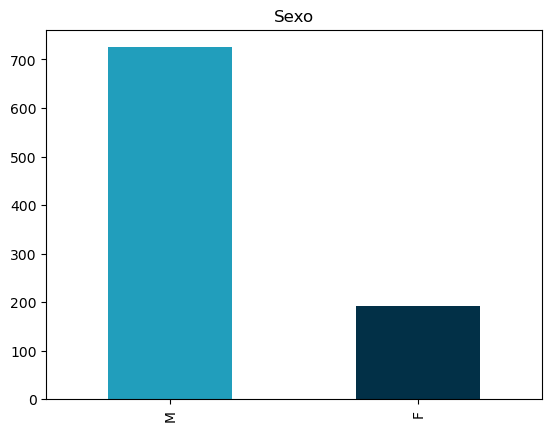

In [10]:
# Visualizando através do gráfico
df_original.Sex.value_counts().plot(kind='bar', title='Sexo',color = ['#219ebc', '#023047']);

In [11]:
# Quantidade de observações por Tipo de Dor Toraxica
df_original.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

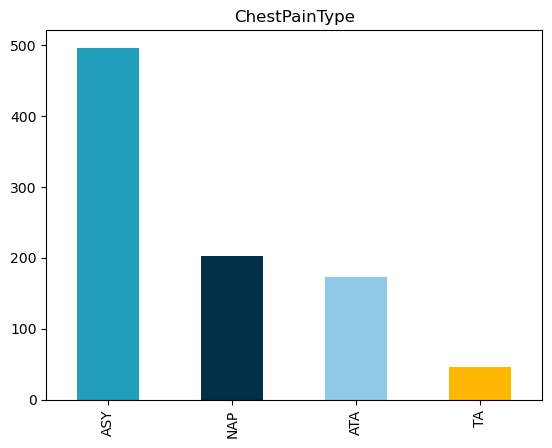

In [12]:
# Visualizando através do gráfico
df_original.ChestPainType.value_counts().plot(kind='bar', title='ChestPainType',color = ['#219ebc', '#023047', '#8ecae6', '#ffb703']);

In [13]:
# Quantidade de observações por Glicemia em Jejum
df_original.groupby(['FastingBS']).size()

FastingBS
0    704
1    214
dtype: int64

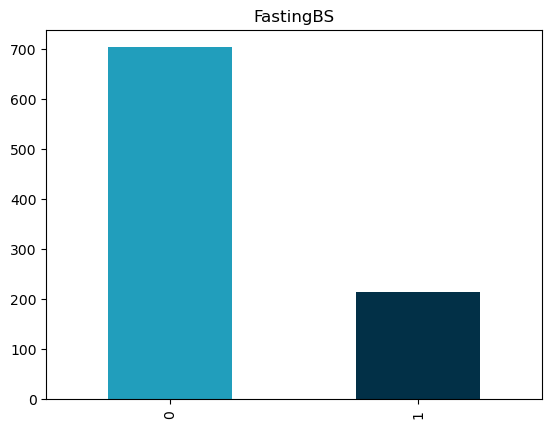

In [14]:
# Visualizando através do gráfico
df_original.FastingBS.value_counts().plot(kind='bar', title='FastingBS',color = ['#219ebc', '#023047']);

In [15]:
# Quantidade de observações por Tipo de Dor Toraxica
df_original.groupby(['RestingECG']).size()

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64

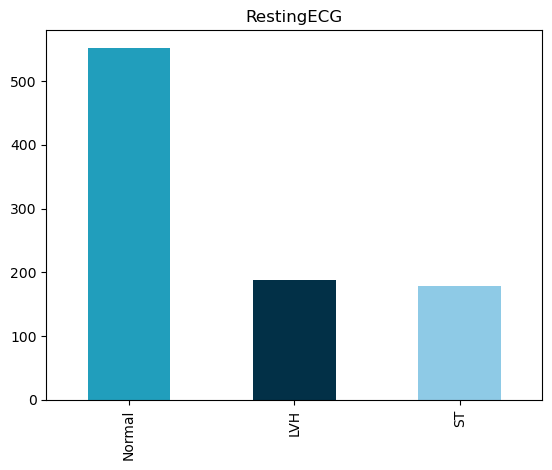

In [16]:
# Visualizando através do gráfico
df_original.RestingECG.value_counts().plot(kind='bar', title='RestingECG',color = ['#219ebc', '#023047', '#8ecae6']);

In [17]:
# Quantidade de observações por Angina Induzida
df_original.groupby(['ExerciseAngina']).size()

ExerciseAngina
N    547
Y    371
dtype: int64

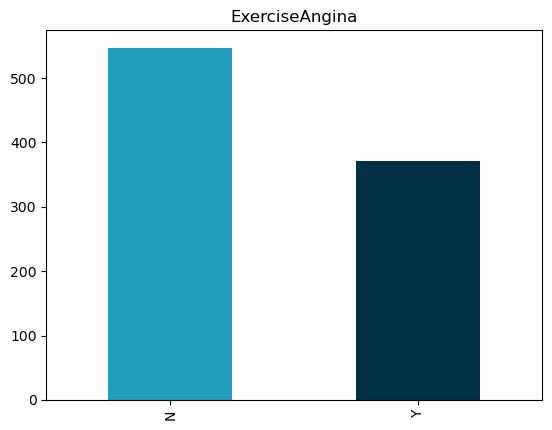

In [18]:
# Visualizando através do gráfico
df_original.ExerciseAngina.value_counts().plot(kind='bar', title='ExerciseAngina',color = ['#219ebc', '#023047']);

In [19]:
# Quantidade de observações Inclinação Pico Exercicio
df_original.groupby(['ST_Slope']).size()

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64

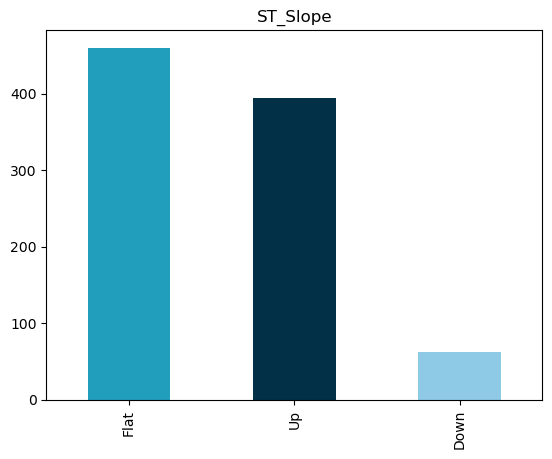

In [20]:
# Visualizando através do gráfico
df_original.ST_Slope.value_counts().plot(kind='bar', title='ST_Slope',color = ['#219ebc', '#023047', '#8ecae6']);

### 6º Avaliar o balanceamento da variável ALVO (Target)

In [21]:
# Quantidade de observações Doença Cardiaca (Variagel TARGET)
df_original.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

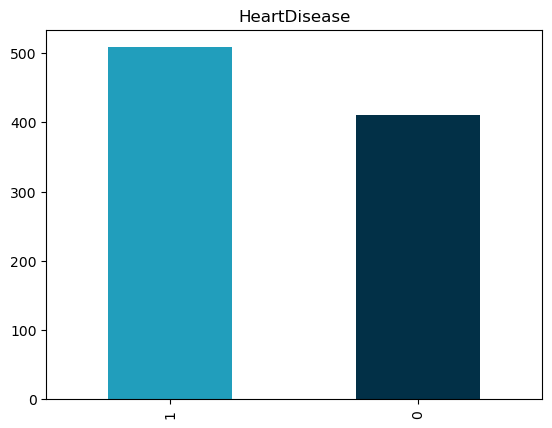

In [22]:
df_original.HeartDisease.value_counts().plot(kind='bar', title='HeartDisease',color = ['#219ebc', '#023047']);

### 7º Analisar a relação de cada variável x variável alvo




In [23]:
# Formatando o tamanho do plot
plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True

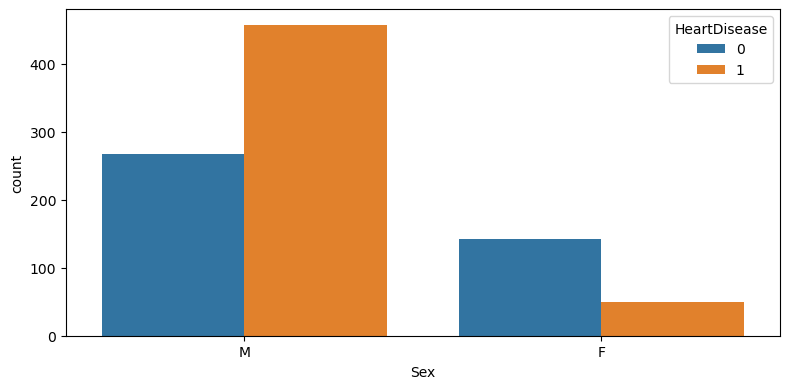

In [24]:
# Visualizando a Variável Sex x HeartDisease

sns.countplot(data = df_original, x = "Sex", hue = "HeartDisease")
plt.show()

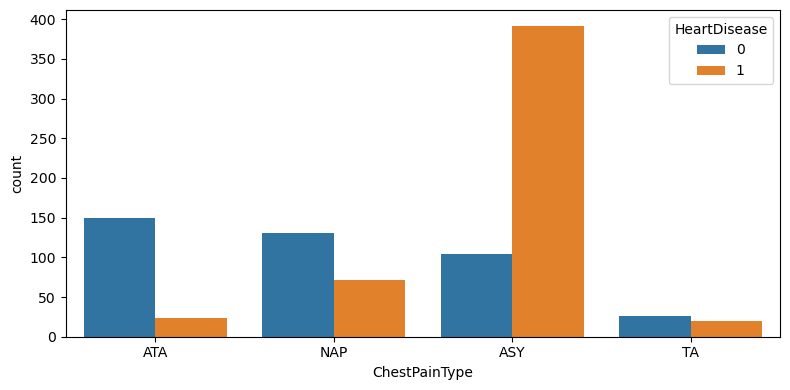

In [25]:
# Visualizando a Variável ChestPainType x HeartDisease

sns.countplot(data = df_original, x = "ChestPainType", hue = "HeartDisease")
plt.show()

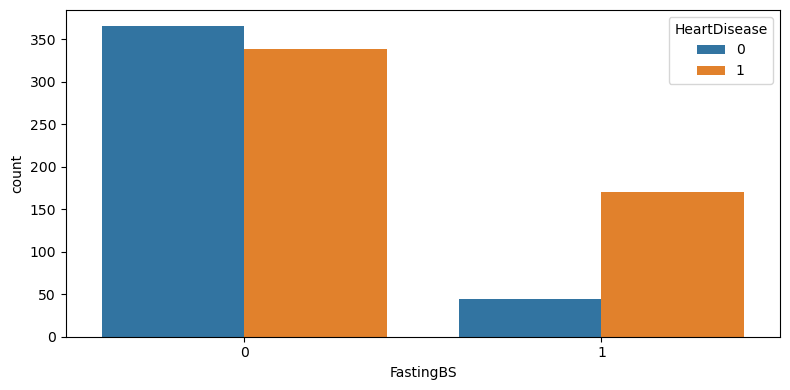

In [26]:
# Visualizando a Variável FastingBS x HeartDisease

sns.countplot(data = df_original, x = "FastingBS", hue = "HeartDisease")
plt.show()

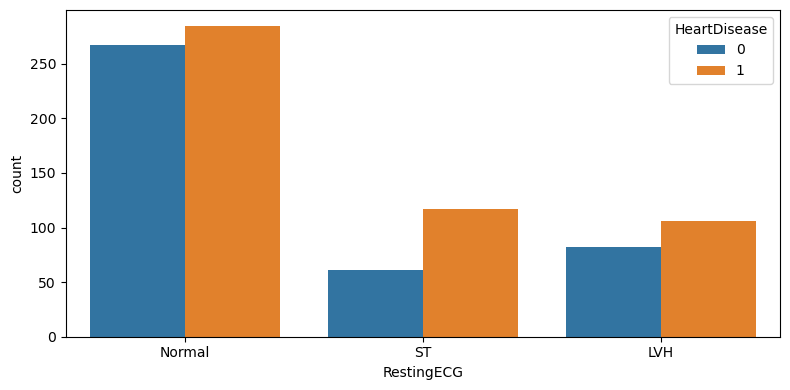

In [27]:
# Visualizando a Variável RestingECG x HeartDisease

sns.countplot(data = df_original, x = "RestingECG", hue = "HeartDisease")
plt.show()

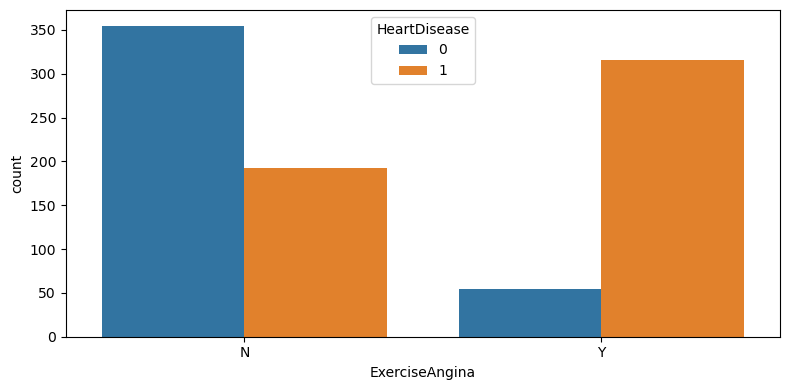

In [28]:
# Visualizando a Variável ExerciseAngina x HeartDisease

sns.countplot(data = df_original, x = "ExerciseAngina", hue = "HeartDisease")
plt.show()

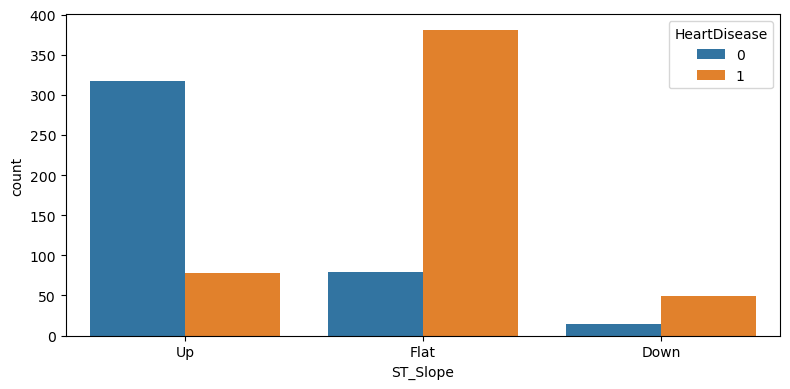

In [29]:
# Visualizando a Variável ST_Slope x HeartDisease

sns.countplot(data = df_original, x = "ST_Slope", hue = "HeartDisease")
plt.show()

### 8º Analisar possíveis outliers

In [30]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_original.columns[0:11].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)   

In [31]:
variaveis_numericas

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [32]:
len(variaveis_numericas)

6

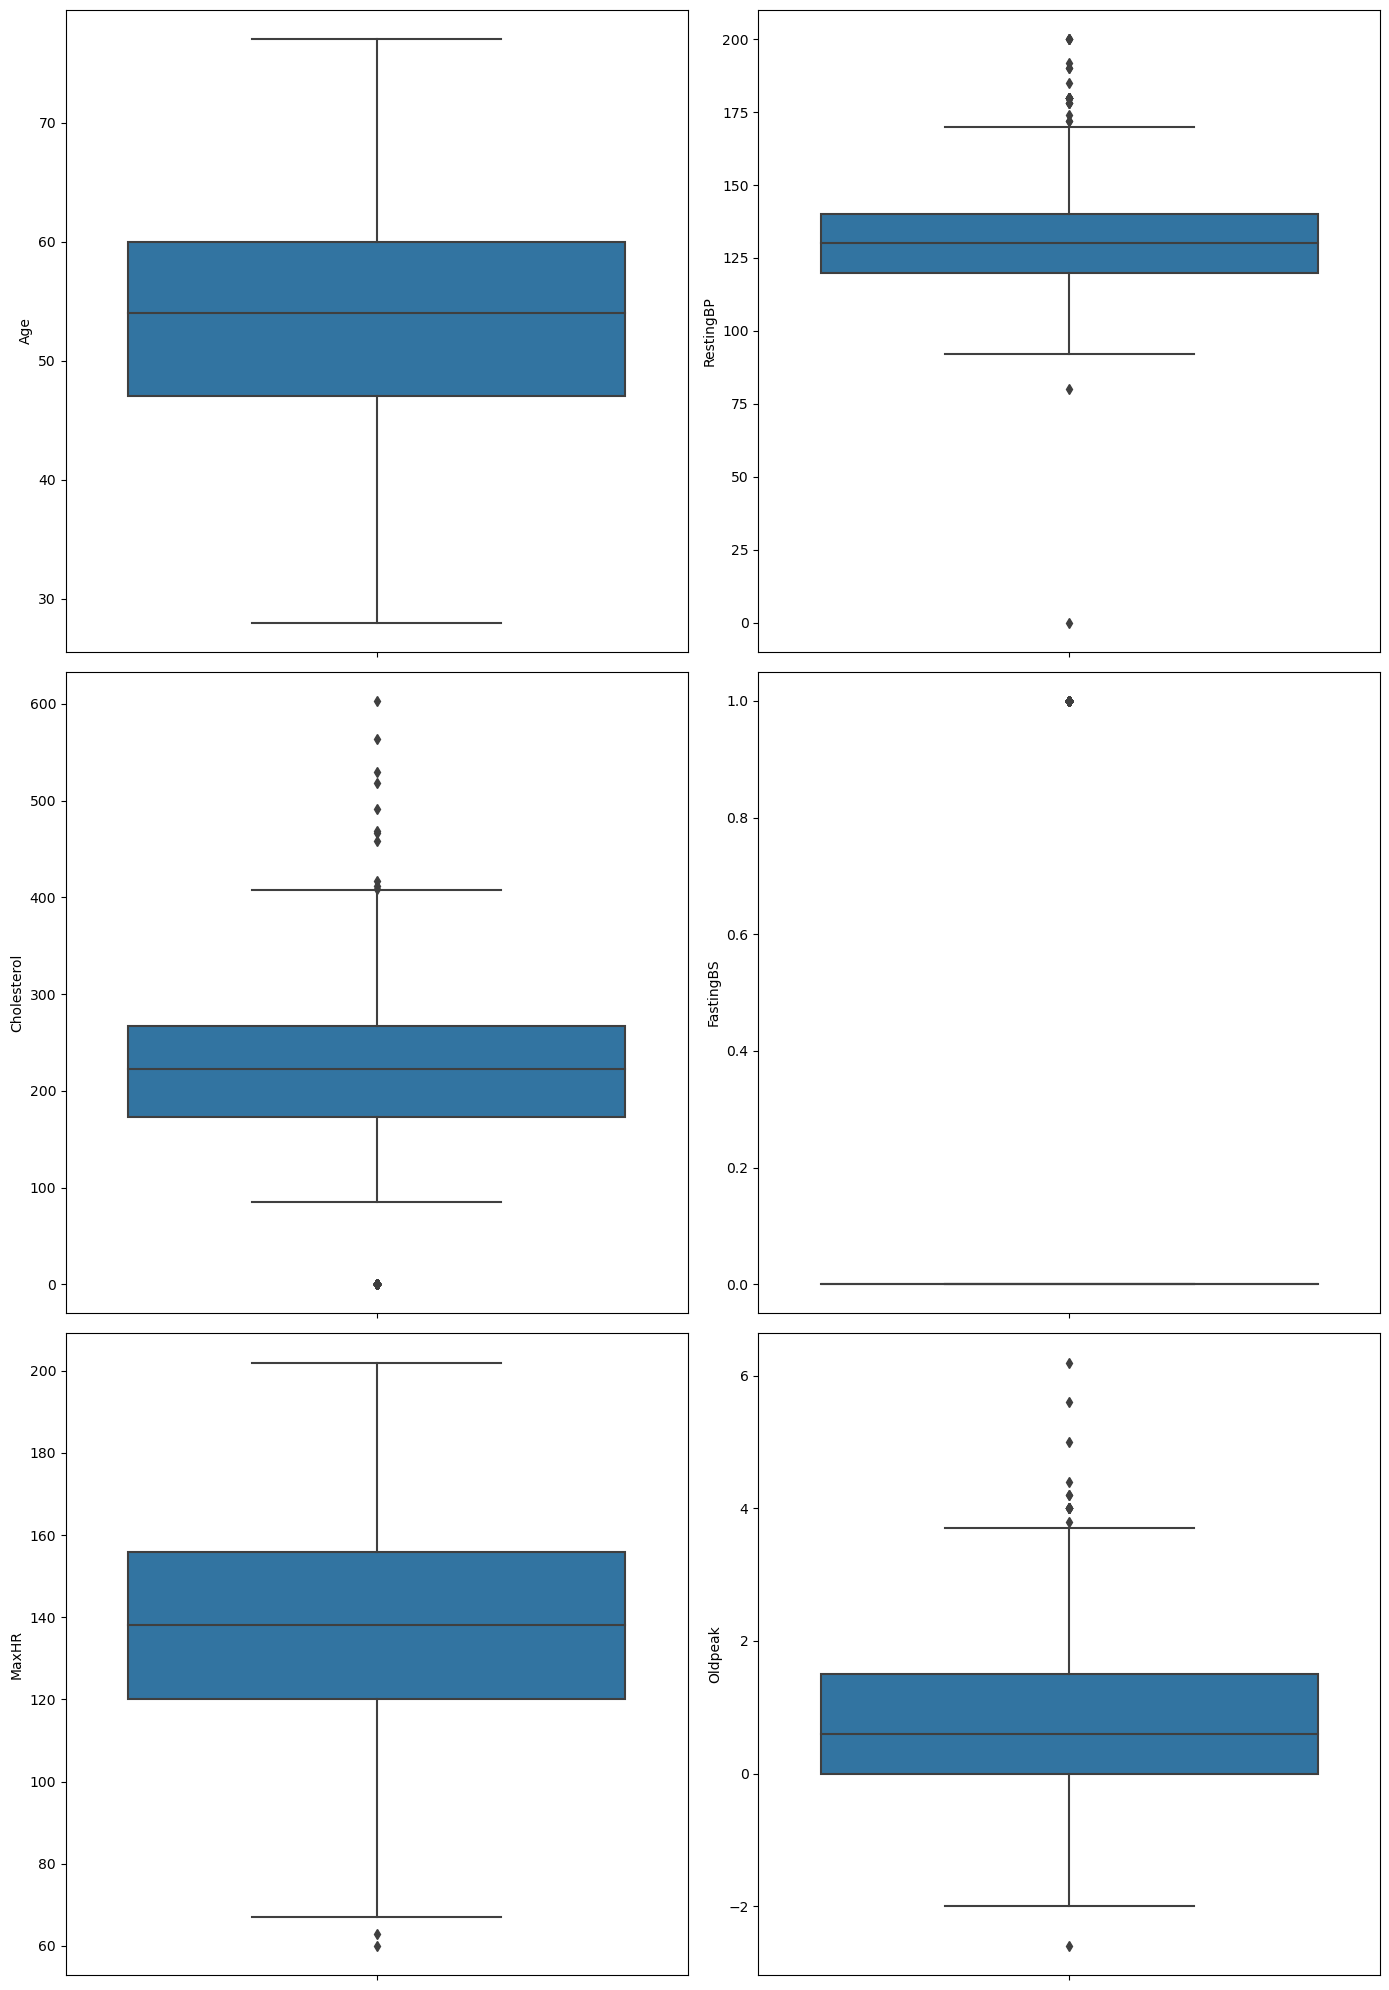

In [33]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

### 9º Analisar a distribuição dos dados

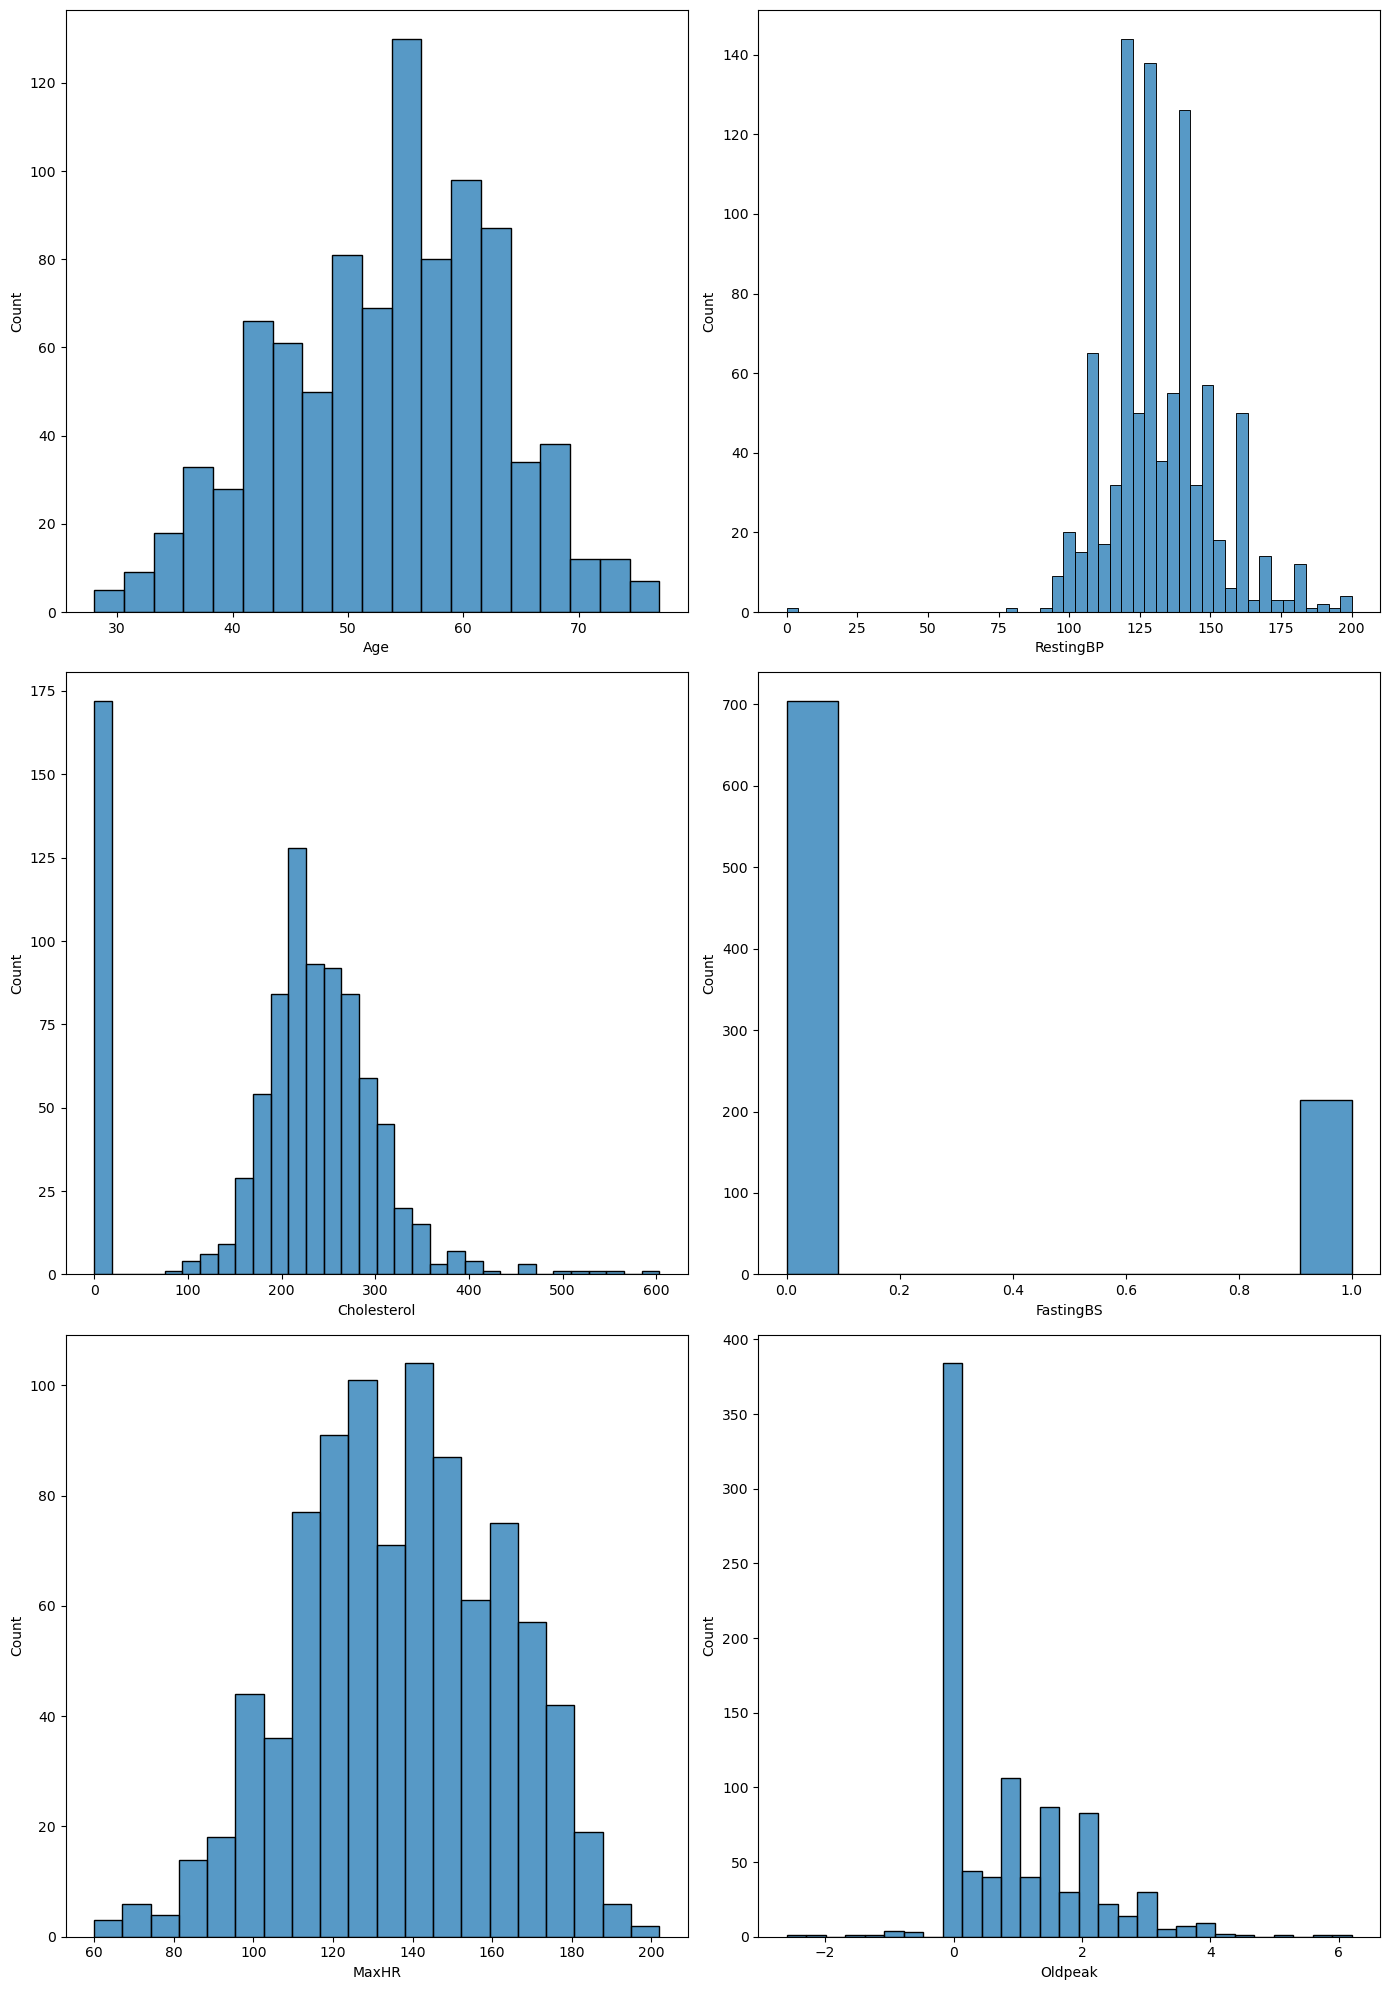

In [34]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()